# 使用Mask R-CNN产生遮罩
### 程式修改自‘How to Use Mask R-CNN in Keras for Object Detection in Photographs’
https://machinelearningmastery.com/how-to-perform-object-detection-in-photographs-with-mask-r-cnn-in-keras/

In [2]:
# 载入相关套件
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from mrcnn.config import Config
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mrcnn.model import MaskRCNN

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [8]:
# 定义函数，在图像加框
def draw_image_with_boxes(filename, boxes_list):
    # 读取图档
    data = plt.imread(filename)
    # 显示图像
    plt.imshow(data)
    
    # 加框
    ax = plt.gca()
    for box in boxes_list:
        # 上/下/左/右 座标
        y1, x1, y2, x2 = box
        # 计算框的宽高
        width, height = x2 - x1, y2 - y1
        # 画框
        rect = Rectangle((x1, y1), width, height, fill=False, color='red')
        ax.add_patch(rect)
        
    # 绘图
    plt.show()

In [9]:
# 定义侦测的组态档
class TestConfig(Config):
    NAME = "test1"       # 测试名称，任意取名
    GPU_COUNT = 1        # GPU 个数
    IMAGES_PER_GPU = 1   # 每个 GPU 负责侦测的图像数
    NUM_CLASSES = 1 + 80 # 类别个数 + 1

C:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


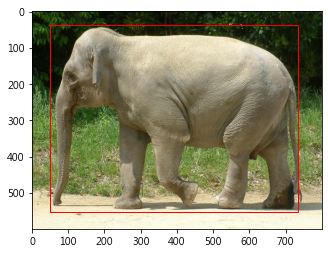

In [11]:
# 建立模型
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())

# 载入权重档
rcnn.load_weights('./MaskRCNN_weights/mask_rcnn_coco.h5', by_name=True)

# 载入图档
img = load_img('./images_test/elephant.jpg')
img = img_to_array(img) # 影像转阵列

# 预测
results = rcnn.detect([img], verbose=0)
# 加框、绘图
draw_image_with_boxes('./images_test/elephant.jpg', results[0]['rois'])

In [13]:
# 定义类别名称
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

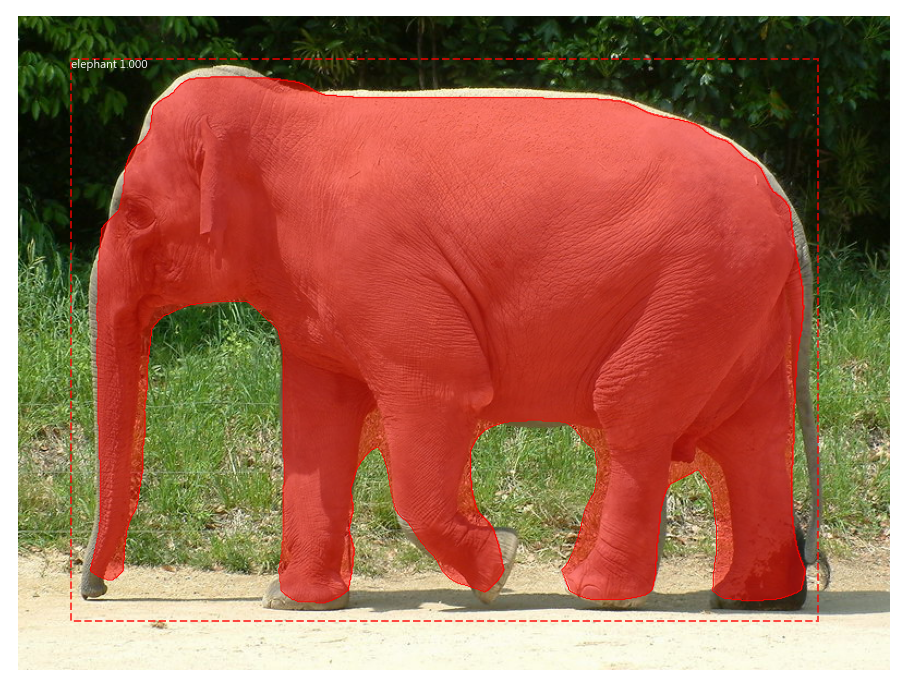

In [14]:
# 加载显示遮罩的类别   
from mrcnn.visualize import display_instances

# 取的第一个遮罩
r = results[0]
# 显示框、遮罩、类别、机率  
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

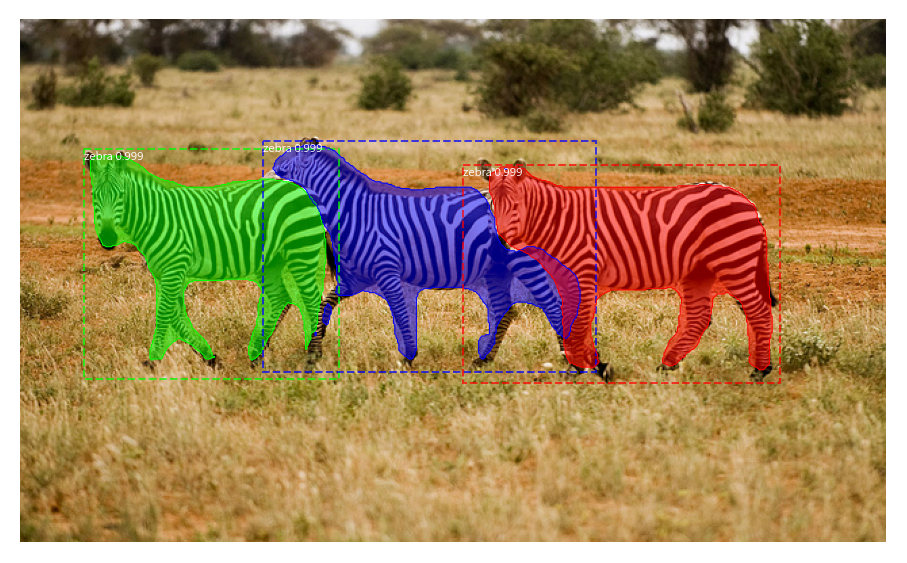

In [15]:
# 载入另一图档
img = load_img('./images_Object_Detection/zebra.jpg')
img = img_to_array(img) # 影像转阵列

# 预测
results = rcnn.detect([img], verbose=0)

# 取的第一个遮罩
r = results[0]
# 显示框、遮罩、类别、机率  
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])